Dogs vs. Cats

Dataset

In [1]:
import pathlib
import os
import shutil

In [2]:
base_dir = pathlib.Path('dogs-vs-cats')
src_dir = pathlib.Path('dogs-vs-cats-original/train')

In [ ]:
print(base_dir / 'test')

In [ ]:
def make_dataset_for_image_dataset_from_directory(subset_name, start_index, end_index):
    for category in ("dog", "cat"):
        dir = base_dir / subset_name / category
        #print(dir)
        if os.path.exists(dir) is False:
            os.makedirs(dir)
        files = [f'{category}.{i}.jpg' for i in range(start_index, end_index)]
        #print(files)
        for i, file in enumerate(files):
            shutil.copyfile(src=src_dir / file, dst=dir / file)
            if i % 100 == 0: # show only once every 100
                print(f'src:{src_dir / file} => dst:{dir / file}')

In [ ]:
make_dataset_for_image_dataset_from_directory('train', 0, 1000)

In [ ]:
make_dataset_for_image_dataset_from_directory('validation', 1000, 1500)

In [ ]:
make_dataset_for_image_dataset_from_directory('test', 1500, 2500)

Let's make Dataset objects

We are ready for image_dataset_from_directory

In [3]:
import tensorflow as tf

In [4]:
train_dataset = tf.keras.utils.image_dataset_from_directory(
    base_dir / 'train',
    image_size=(180,180),
    batch_size=32
)

Found 2000 files belonging to 2 classes.


In [5]:
for data_batch, labels_batch in train_dataset:
    print(f'data batch shape: {data_batch.shape}')
    print(f'label batch shape: {labels_batch.shape}')
    print(f'labels: {labels_batch}')
    break

data batch shape: (32, 180, 180, 3)
label batch shape: (32,)
labels: [1 1 1 1 0 1 0 0 1 1 0 0 1 1 1 1 0 1 0 0 1 0 1 0 0 1 1 1 0 0 0 1]


In [6]:
validation_dataset = tf.keras.utils.image_dataset_from_directory(
    base_dir / 'validation',
    image_size=(180,180),
    batch_size=32
)

Found 1000 files belonging to 2 classes.


In [7]:
test_dataset = tf.keras.utils.image_dataset_from_directory(
    base_dir / 'test',
    image_size=(180,180),
    batch_size=32
)

Found 2000 files belonging to 2 classes.


In [8]:
import tensorflow as tf
from tensorflow import keras
from keras import layers

In [9]:
inputs = layers.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=16, kernel_size=3, activation="relu")(x)
x = layers.AveragePooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.AveragePooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.AveragePooling2D(pool_size=2)(x)

x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)

In [10]:
model = tf.keras.Model(inputs=inputs, outputs=outputs)

In [11]:
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [12]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 16)      448       
                                                                 
 average_pooling2d (AverageP  (None, 89, 89, 16)       0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 32)        4640      
                                                                 
 average_pooling2d_1 (Averag  (None, 43, 43, 32)       0         
 ePooling2D)                                                 

In [13]:
callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=2),
    tf.keras.callbacks.ModelCheckpoint(filepath='model.{epoch:02d}-{val_loss:.2f}.keras'),
    tf.keras.callbacks.TensorBoard(log_dir='./logs'),
]

In [14]:
history = model.fit(train_dataset, epochs=20, 
                    validation_data=validation_dataset, 
                    callbacks=callbacks)

Epoch 1/20
63/63 [==============================] - 16s 236ms/step - loss: 0.7005 - accuracy: 0.5230 - val_loss: 0.6812 - val_accuracy: 0.6030
Epoch 2/20
63/63 [==============================] - 14s 219ms/step - loss: 0.6722 - accuracy: 0.6015 - val_loss: 0.6462 - val_accuracy: 0.6300
Epoch 3/20
63/63 [==============================] - 15s 243ms/step - loss: 0.6319 - accuracy: 0.6570 - val_loss: 0.6334 - val_accuracy: 0.6350
Epoch 4/20
63/63 [==============================] - 16s 246ms/step - loss: 0.5991 - accuracy: 0.6805 - val_loss: 0.6127 - val_accuracy: 0.6510
Epoch 5/20
63/63 [==============================] - 15s 237ms/step - loss: 0.5656 - accuracy: 0.7110 - val_loss: 0.8065 - val_accuracy: 0.5720
Epoch 6/20
63/63 [==============================] - 13s 207ms/step - loss: 0.5383 - accuracy: 0.7355 - val_loss: 0.6497 - val_accuracy: 0.6540


In [15]:
import matplotlib.pyplot as plt

In [16]:
acc = history.history['accuracy']
loss = history.history['loss']

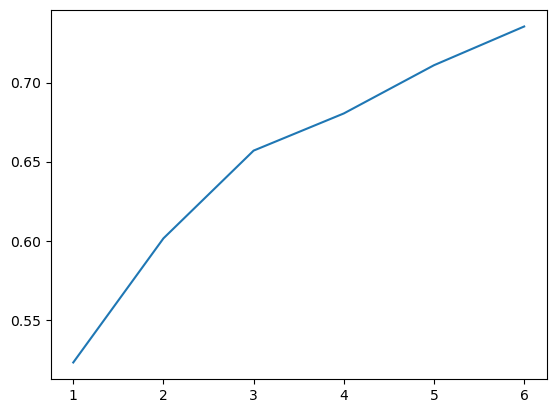

In [17]:
plt.plot(range(1, len(acc)+1), acc, label='Traiing Acc')

In [18]:
for test_batch, labels_batch in test_dataset:
    predictions = model.predict(test_batch)
    break

1/1 [==============================] - 0s 269ms/step


In [19]:
predictions

array([[0.5462299 ],
       [0.53612876],
       [0.9194437 ],
       [0.1502636 ],
       [0.8559837 ],
       [0.7365391 ],
       [0.49755037],
       [0.48507532],
       [0.28246433],
       [0.20968767],
       [0.4701146 ],
       [0.59551007],
       [0.12109622],
       [0.63625395],
       [0.37670496],
       [0.8468374 ],
       [0.978113  ],
       [0.22279824],
       [0.35601476],
       [0.5515214 ],
       [0.44149956],
       [0.98732525],
       [0.11371589],
       [0.44974387],
       [0.35790452],
       [0.36668983],
       [0.5487019 ],
       [0.59595037],
       [0.5751432 ],
       [0.23232342],
       [0.91765255],
       [0.7377555 ]], dtype=float32)